In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = '16'
plt.rcParams['figure.dpi'] = 125
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['pcolor.shading'] = 'auto'
import numpy as np 
import xarray as xr

reading parameters...
NARROWBAND SIMULATION
earth-atmosphere


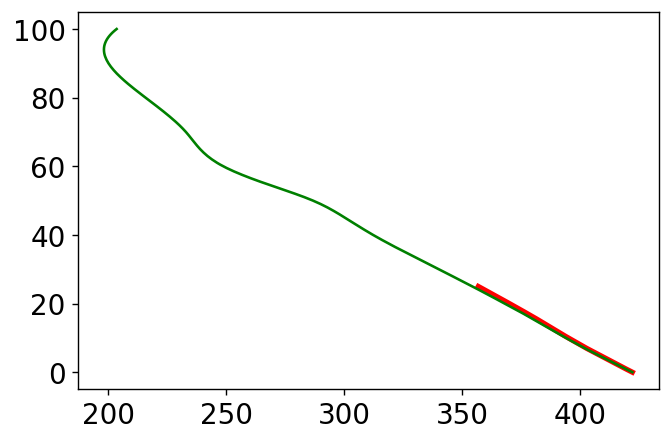

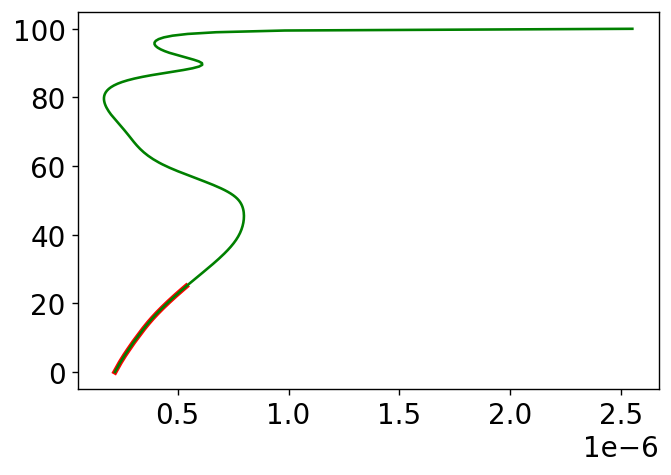

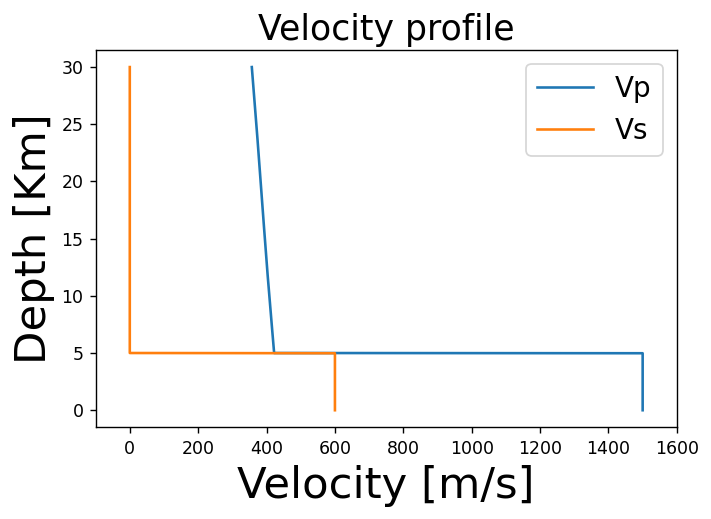

SOLVING  SEISMO-ACOUSTIC
Get Green's
Go to range
17.256471633911133
directory exist. removing and recreating


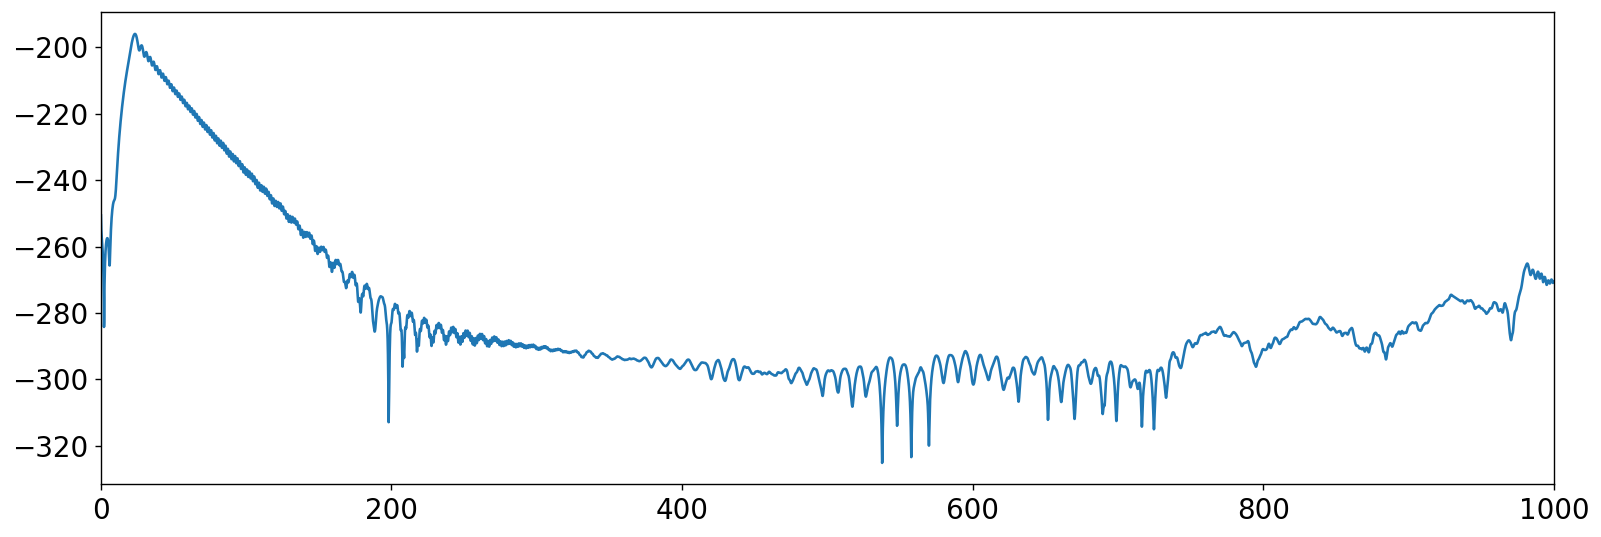

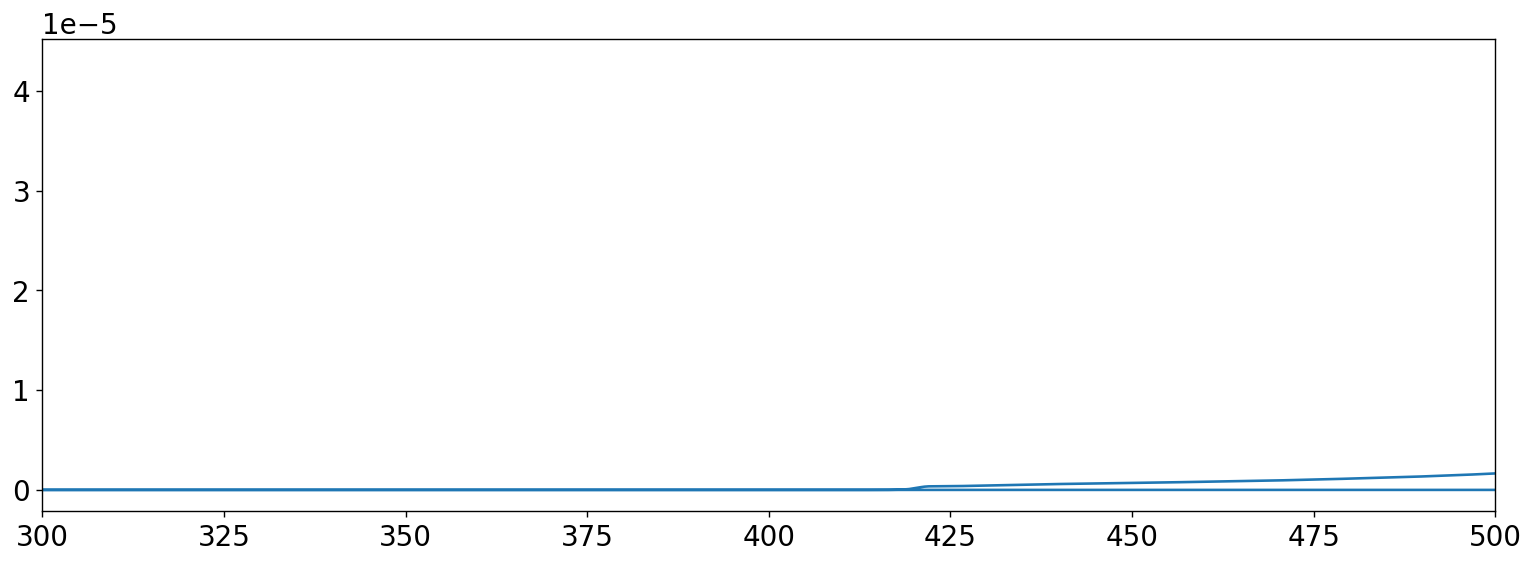

/home/gil/dev/propagation_models/SA_FFP/output_.py:292: RuntimeWarning: divide by zero encountered in log10
  displacement[l,:]=20*np.log10(a1/a2)


In [93]:
%run FFP_SA.py input-parameters

In [94]:
data_on = np.loadtxt('Results/acoustic_test_attn_on/TL_alt_20000.csv')
data_off = np.loadtxt('Results/acoustic_test_attn_off/TL_alt_20000.csv')

In [113]:
p1 = 100
p = 5000
print(data_off[p,0])
data_off[p1:p,1] - data_on[p1:p,1]

583.45


array([ 0.069,  0.07 ,  0.07 , ...,  0.361,  0.352,  0.343])

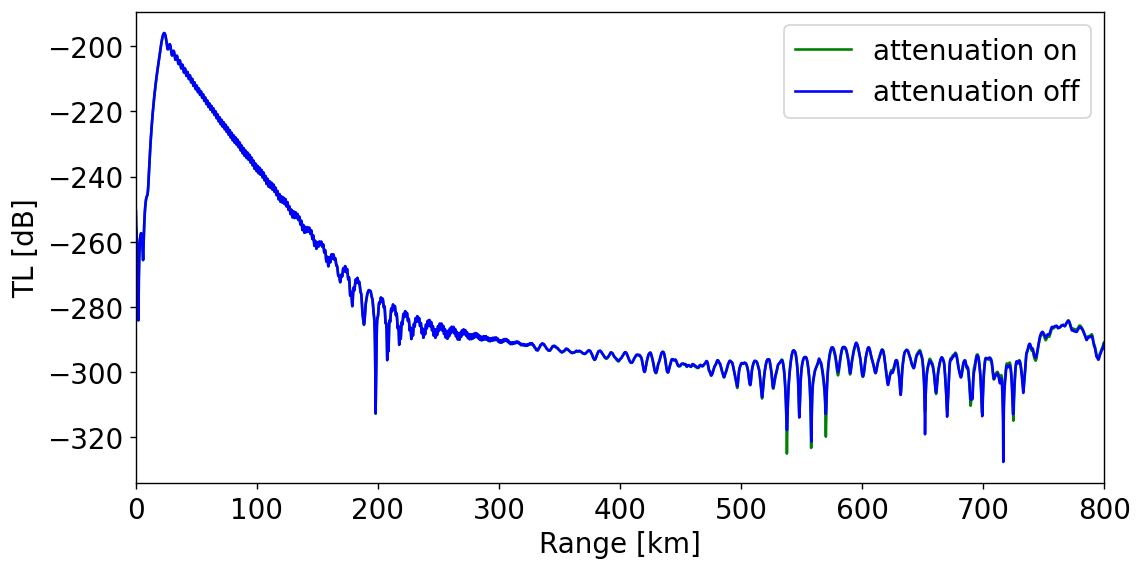

In [116]:
plt.figure(figsize=(10,5))
plt.plot(data_on[:,0], data_on[:,1], 'g', label='attenuation on')
plt.plot(data_off[:,0], data_off[:,1], 'b', label='attenuation off')
plt.xlim(0,800)
plt.ylabel("TL [dB]")
plt.xlabel("Range [km]")
plt.legend()
plt.show()

In [117]:
tl = xr.open_dataset('Results/acoustic_test_attn_on/TL_intensity_ref_source.nc')

In [118]:
tl

<xarray.Dataset>
Dimensions:   (Altitude: 1500, Range: 16384)
Coordinates:
  * Range     (Range) float32 0.1167 0.2333 0.35 ... 1.911e+03 1.911e+03
  * Altitude  (Altitude) float64 -5.0 -4.98 -4.96 -4.94 ... 24.94 24.96 24.98
Data variables:
    TL        (Altitude, Range) float32 ...
Attributes:
    description:  Trnsmission loss
    units:        dB

In [119]:
r = tl['Range'].values
alt = tl['Altitude'].values
TL = tl['TL'].values
tl.close()

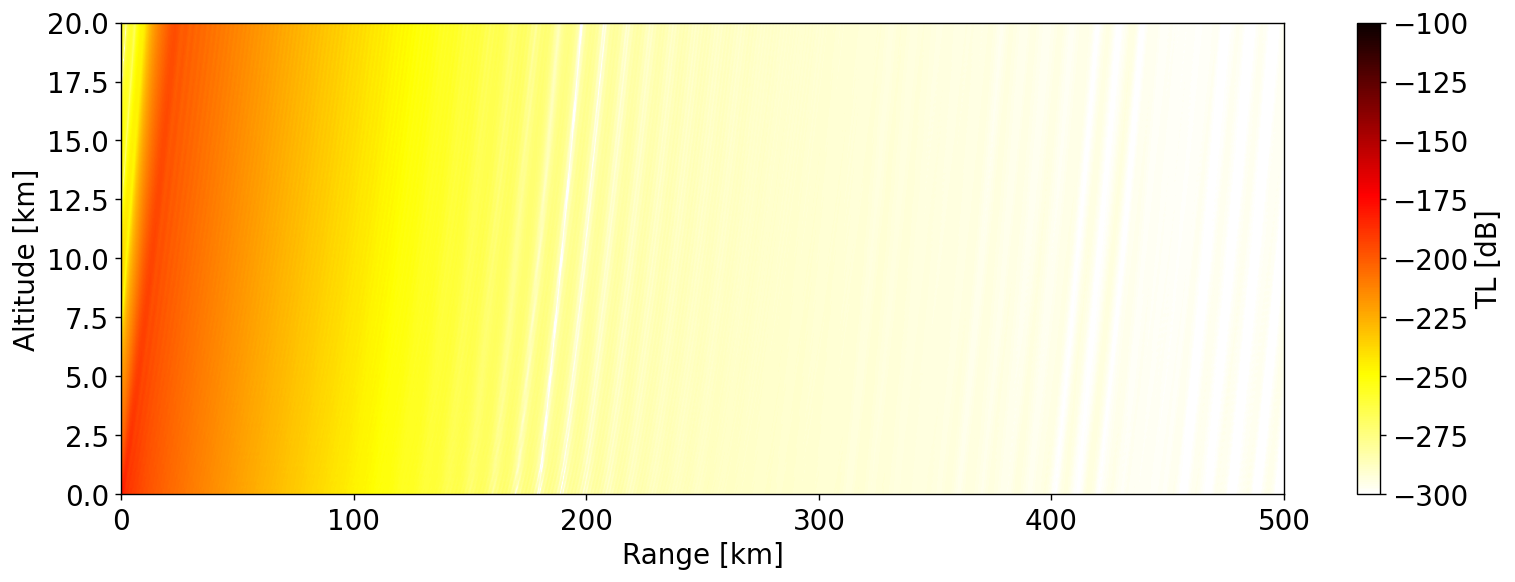

In [120]:
# getting the original colormap using cm.get_cmap() function
orig_map=plt.cm.get_cmap('hot')
  
# reversing the original colormap using reversed() function
reversed_map = orig_map.reversed()

plt.figure(figsize=(15,5))
plt.pcolormesh(r, alt, TL,  cmap=reversed_map)
plt.ylim([0,20])
plt.xlim([0,500])
plt.xlabel('Range [km]')
plt.ylabel('Altitude [km]')
plt.colorbar(label='TL [dB]')
plt.clim([-300,-100])
plt.show()

In [ ]:
a = np.complex64(5 + 1j*2)
a.type